In [3]:
import warnings

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from pydataxm import *                           #Se realiza la importación de las librerias necesarias para ejecutar                        
from pydataxm.pydataxm import ReadDB as apiXM 
import datetime as dt                            
import pandas as pd
from pathlib import Path
import os
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import calendar

In [4]:
s_path=Path.cwd()
s_prt_path=s_path.parent

objetoAPI = pydataxm.ReadDB()                    #Se almacena el servicio en el nombre objetoAPI
df =objetoAPI.get_collections()   


In [5]:
# Descargar información de sinergox
FechaIni=dt.date(2021, 12, 1)
FechaFin=dt.date(2025, 1, 10)

In [6]:
df_Rec= apiXM.request_data(pydataxm.ReadDB(),    #Se indica el objeto que contiene el serivicio
                        "ListadoRecursos",                #Se indica el nombre de la métrica tal como se llama en el campo metricID
                        "Sistema",                 #Campo que indica si es Sistema, Agente, Recurso, Comercializador
                        FechaIni,       #Corresponde a la fecha inicial de la consulta
                        FechaFin)      #Corresponde a la fecha final de la consulta
df_Rec.rename(columns={'Values_Name':'Planta'},inplace=True)
df_Rec=df_Rec.drop('Date',axis=1)
# df_Rec.to_csv('Recursos.csv')

In [7]:
df_Rec.head(5)

,Id,Values_Code,Planta,Values_Type,Values_Disp,Values_RecType,Values_CompanyCode,Values_EnerSource,Values_OperStartdate,Values_State
0,Sistema,2QBW,EL POPAL,HIDRAULICA,NO DESPACHADO CENTRALMENTE,NORMAL,ISGG,AGUA,2014-03-31,OPERACION
1,Sistema,2QEK,SALTO II,HIDRAULICA,DESPACHADO CENTRALMENTE,FILO DE AGUA,ENDG,AGUA,2014-06-25,OPERACION
2,Sistema,2QRL,LA REBUSCA,HIDRAULICA,NO DESPACHADO CENTRALMENTE,GEN. DISTRIBUIDA,HZEG,AGUA,2014-07-24,OPERACION
3,Sistema,2QV2,BAJO TULUA,HIDRAULICA,NO DESPACHADO CENTRALMENTE,NORMAL,EPSG,AGUA,2015-01-30,OPERACION
4,Sistema,2R22,LAGUNETA,HIDRAULICA,NO DESPACHADO CENTRALMENTE,NORMAL,ENDG,AGUA,2014-12-17,OPERACION


In [8]:
# Unit kWh
df_OEF= apiXM.request_data(pydataxm.ReadDB(),    #Se indica el objeto que contiene el serivicio
                        "ObligEnerFirme",                #Se indica el nombre de la métrica tal como se llama en el campo metricID
                        "Recurso",                 #Campo que indica si es Sistema, Agente, Recurso, Comercializador
                        FechaIni,       #Corresponde a la fecha inicial de la consulta
                        FechaFin)      #Corresponde a la fecha final de la consulta
df_OEF.rename(columns={'Value':'OEF'},inplace=True)
df_OEF['OEF']=df_OEF['OEF']/1000000

# Unit kWh
df_ENF= apiXM.request_data(pydataxm.ReadDB(),    #Se indica el objeto que contiene el serivicio
                        "ENFICC",                #Se indica el nombre de la métrica tal como se llama en el campo metricID
                        "Recurso",                 #Campo que indica si es Sistema, Agente, Recurso, Comercializador
                        FechaIni,       #Corresponde a la fecha inicial de la consulta
                        FechaFin)      #Corresponde a la fecha final de la consulta
df_ENF.rename(columns={'Value':'ENFICC'},inplace=True)
df_ENF['ENFICC']=df_ENF['ENFICC']/1000000

In [9]:
# Unit kWh
df_Apor= apiXM.request_data(pydataxm.ReadDB(),    #Se indica el objeto que contiene el serivicio
                        "AporEner",                #Se indica el nombre de la métrica tal como se llama en el campo metricID
                        "Sistema",                 #Campo que indica si es Sistema, Agente, Recurso, Comercializador
                        FechaIni,       #Corresponde a la fecha inicial de la consulta
                        FechaFin)      #Corresponde a la fecha final de la consulta
df_Apor.rename(columns={'Value':'Aportes'},inplace=True)
df_Apor['Aportes']=df_Apor['Aportes']/1000000

In [10]:
# # Unit kWh
# df_Dem= apiXM.request_data(pydataxm.ReadDB(),    #Se indica el objeto que contiene el serivicio
#                         "DemaCome",                #Se indica el nombre de la métrica tal como se llama en el campo metricID
#                         "Sistema",                 #Campo que indica si es Sistema, Agente, Recurso, Comercializador
#                         FechaIni,       #Corresponde a la fecha inicial de la consulta
#                         FechaFin)      #Corresponde a la fecha final de la consulta
# # df_Dem.rename(columns={'Value':'Demanda'},inplace=True)
# # df_Dem['Demanda']=df_Dem['Demanda']/1000

# df_DemP=df_Dem.copy()
# df_DemP=df_DemP.drop(['Id','Values_code'],axis=1)
# for i in range(1,25):
#     if i<10:
#         df_DemP=df_DemP.rename(columns={'Values_Hour0' + str(i): i})
#     else:
#         df_DemP=df_DemP.rename(columns={'Values_Hour' + str(i): i})

# df_DemP=pd.melt(df_DemP, id_vars=['Date'], var_name='Periodo', value_name='DemMW')
# df_DemP=df_DemP.groupby(['Date'])[['DemMW']].sum()
# df_DemP=df_DemP.reset_index()
# df_DemP

In [11]:
# Unit kWh
df_DemSIN= apiXM.request_data(pydataxm.ReadDB(),    #Se indica el objeto que contiene el serivicio
                        "DemaSIN",                #Se indica el nombre de la métrica tal como se llama en el campo metricID
                        "Sistema",                 #Campo que indica si es Sistema, Agente, Recurso, Comercializador
                        FechaIni,       #Corresponde a la fecha inicial de la consulta
                        FechaFin)      #Corresponde a la fecha final de la consulta
df_DemSIN.rename(columns={'Value':'Demanda'},inplace=True)
df_DemSIN['Demanda']=df_DemSIN['Demanda']/1000000
df_DemSIN.head(5)

,Id,Demanda,Date
0,Sistema,214.778469,2021-12-01
1,Sistema,216.453951,2021-12-02
2,Sistema,219.009012,2021-12-03
3,Sistema,210.420525,2021-12-04
4,Sistema,193.762620,2021-12-05


In [12]:
df_DemSIN.to_csv('Demanda.csv')

In [13]:
# Unit kWh
df_PB= apiXM.request_data(pydataxm.ReadDB(),    #Se indica el objeto que contiene el serivicio
                        "PrecBolsNaci",                #Se indica el nombre de la métrica tal como se llama en el campo metricID
                        "Sistema",                 #Campo que indica si es Sistema, Agente, Recurso, Comercializador
                        FechaIni,       #Corresponde a la fecha inicial de la consulta
                        FechaFin)      #Corresponde a la fecha final de la consulta

In [14]:
df_PBP=df_PB.copy()
df_PBP=df_PBP.drop(['Id','Values_code'],axis=1)
for i in range(1,25):
    if i<10:
        df_PBP=df_PBP.rename(columns={'Values_Hour0' + str(i): i})
    else:
        df_PBP=df_PBP.rename(columns={'Values_Hour' + str(i): i})

df_PBP=pd.melt(df_PBP, id_vars=['Date'], var_name='Periodo', value_name='PB')
df_PBP=df_PBP.groupby(['Date'])[['PB']].mean()
df_PBP=df_PBP.reset_index()
df_PBP

,Date,PB
0,2021-12-01,98.531030
1,2021-12-02,101.961287
2,2021-12-03,105.828527
3,2021-12-04,112.934277
4,2021-12-05,120.709697
...,...,...
1132,2025-01-06,315.830515
1133,2025-01-07,343.695452
1134,2025-01-08,241.238483
1135,2025-01-09,221.574825


In [15]:
# df_EDADia=df_OEF.copy()
# df_EDADia=df_EDADia.merge(df_ENF,left_on=['Date','Code'],right_on=['Date','Code'], how='left')[['Date','Code','OEF', 'ENFICC']]
# df_EDADia['EDA']=df_EDADia['ENFICC']-df_EDADia['OEF']
# df_EDADia['EDA'] = np.where(df_EDADia['EDA'] < 0, 0, df_EDADia['EDA'])
# df_EDADia=df_EDADia.groupby(['Date'])[['EDA']].sum()
# df_EDADia=df_EDADia.reset_index()
# df_EDADia

In [16]:
def Date(row):
    # print(int(row['year']), int(row['mes']))
    return dt.datetime(int(row['year']), int(row['mes']), 1)


In [17]:
# Lectura de datos de enrtrada para el cálculo
s_parentpath=Path('C:\Alejo\ExtracciónDatos\TareaIHF')
filepath=s_parentpath.joinpath(s_parentpath,'EDA_2024.xlsx')

# Carga del nivel probabilístico del embalse
sheet_name='EDA_Mes'
df_EDA=pd.read_excel(filepath, header=0,sheet_name=sheet_name)
# df_EDA['year']=df_EDA['year'].round(0)
# df_EDA['mes']=df_EDA['mes'].round(0)
# df_EDA['Date'] = df_EDA.apply(lambda row: dt.datetime(row['year'], row['mes'], 1), axis=1)
# df_EDA['Date'] = df_EDA.apply(lambda row: Date(row), axis=1)
# df_EDA['DaysInMonth'] = df_EDA['Date'].dt.days_in_month
# df_EDA['EDADay']=df_EDA['EDA']/df_EDA['DaysInMonth']

sheet_name='Consumo_Gas'
df_Gas=pd.read_excel(filepath, header=0,sheet_name=sheet_name)

df_Gas['ConsumoGas']=df_Gas['ConsumoGas']/1000
df_Gas

,Fecha,ConsumoGas
0,2021-12-01,917.746
1,2021-12-02,925.795
2,2021-12-03,934.697
3,2021-12-04,899.665
4,2021-12-05,835.736
...,...,...
1080,2024-11-15,965.215
1081,2024-11-16,864.006
1082,2024-11-17,850.883
1083,2024-11-18,765.063


In [18]:
df_data=df_OEF.copy()
df_data=df_data.merge(df_Rec,left_on=['Code'],right_on=['Values_Code'], how='left')[['Date','Code','Planta', 'OEF']]
df_data=df_data[(df_data['Planta'].isin(['TEBSAB CC','TERMOCANDELARIA CC','BARRANQUILLA 3','BARRANQUILLA 4']))]
df_data=df_data.groupby(['Date'])[['OEF']].sum()
df_data=df_data.reset_index()
df_data=df_data.merge(df_Apor,left_on=['Date'],right_on=['Date'], how='left')[['Date', 'OEF','Aportes']]
df_data=df_data.merge(df_DemSIN,left_on=['Date'],right_on=['Date'], how='left')[['Date', 'OEF','Aportes','Demanda']]
df_data['year']=df_data['Date'].dt.year
df_data['mes']=df_data['Date'].dt.month
df_data=df_data.merge(df_EDA,left_on=['year','mes'],right_on=['year','mes'], how='left')[['Date', 'OEF','Aportes','Demanda','EDA']]
df_data=df_data.merge(df_Gas,left_on=['Date'],right_on=['Fecha'], how='left')[['Date', 'OEF','Aportes','Demanda','EDA','ConsumoGas']]
df_data=df_data.merge(df_PBP,left_on=['Date'],right_on=['Date'], how='left')[['Date', 'OEF','Aportes','Demanda','EDA','ConsumoGas','PB']]
df_data.head(5)

,Date,OEF,Aportes,Demanda,EDA,ConsumoGas,PB
0,2021-12-01,19.860210,198.6273,214.778469,18.214112,917.746,98.531030
1,2021-12-02,20.059695,145.6872,216.453951,18.214112,925.795,101.961287
2,2021-12-03,20.259638,146.8244,219.009012,18.214112,934.697,105.828527
3,2021-12-04,19.466488,158.9235,210.420525,18.214112,899.665,112.934277
4,2021-12-05,17.928296,138.9942,193.762620,18.214112,835.736,120.709697


In [19]:
# Normalización de datos
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA

dates=df_data['Date']
l_col=list(df_data.columns)
l_col.remove('Date')
df_dataMod=df_data[l_col]

# Escalar los datos
scaler = MinMaxScaler(copy=True, feature_range=(0, 1)) 
nombres = df_dataMod.columns
X_norm = scaler.fit_transform(df_dataMod)
X_norm = pd.DataFrame(X_norm, columns = nombres)

X_norm['Date']=dates

# Calculate the 5-day moving average
X_norm['OEF_MA'] = X_norm['OEF'].rolling(window=5).mean()
X_norm['Aportes_MA'] = X_norm['Aportes'].rolling(window=5).mean()
X_norm['Demanda_MA'] = X_norm['Demanda'].rolling(window=5).mean()
X_norm['EDA_MA'] = X_norm['EDA'].rolling(window=5).mean()
X_norm['ConsumoGas_MA'] = X_norm['ConsumoGas'].rolling(window=5).mean()
X_norm['PB_MA'] = X_norm['PB'].rolling(window=5).mean()
# Shift the date column to align with the first date in the window
# X_norm['First_Date'] = X_norm['Date'].shift(-(5 - 1))
X_norm=X_norm.dropna()


# Valores deseados altos 
X_norm['PB_MA']=1-X_norm['PB_MA']
X_norm['OEF_MA']=1-X_norm['OEF_MA']
X_norm['Demanda_MA']=1-X_norm['Demanda_MA']
X_norm['ConsumoGas_MA']=1-X_norm['ConsumoGas_MA']

X_norm['Indicador']= 0.1*X_norm['OEF_MA'] + 0.3*X_norm['Aportes_MA'] + 0.15*X_norm['Demanda_MA'] + 0.1*X_norm['EDA_MA'] + 0.15*X_norm['ConsumoGas_MA'] + 0.2*X_norm['PB_MA']

# df_features = X_norm[['OEF_MA','Aportes_MA', 'Demanda_MA', 'EDA_MA', 'ConsumoGas_MA']]
# pca = PCA(n_components=1)  # Reducir a 2 componentes principales
# df_pca = pca.fit_transform(df_features)

X_norm.head(10)

,OEF,Aportes,Demanda,EDA,ConsumoGas,PB,Date,OEF_MA,Aportes_MA,Demanda_MA,EDA_MA,ConsumoGas_MA,PB_MA,Indicador
4,0.107086,0.141546,0.361155,0.310539,0.315805,0.010787,2021-12-05,0.817683,0.173571,0.421308,0.310539,0.592259,0.994503,0.515829
5,0.207153,0.123281,0.653142,0.310539,0.443284,0.011348,2021-12-06,0.815991,0.149620,0.416312,0.310539,0.589273,0.992545,0.506886
6,0.204818,0.116601,0.645176,0.310539,0.463432,0.017304,2021-12-07,0.816658,0.142353,0.417166,0.310539,0.584466,0.989682,0.503607
7,0.127442,0.089051,0.420416,0.310539,0.348664,0.019895,2021-12-08,0.834696,0.129188,0.469464,0.310539,0.605055,0.986623,0.511782
8,0.209861,0.094714,0.660179,0.310539,0.456270,0.030657,2021-12-09,0.828728,0.113038,0.451987,0.310539,0.594509,0.982002,0.501213
9,0.209388,0.086528,0.657814,0.310539,0.480885,0.043262,2021-12-10,0.808268,0.102035,0.392655,0.310539,0.561493,0.975507,0.480715
10,0.162433,0.107468,0.527942,0.310539,0.438885,0.053268,2021-12-11,0.817212,0.098873,0.417695,0.310539,0.562373,0.967123,0.482872
11,0.089159,0.136274,0.312067,0.310539,0.369228,0.062821,2021-12-12,0.840344,0.102807,0.484317,0.310539,0.581214,0.958019,0.497364
12,0.176032,0.115058,0.585650,0.310539,0.473798,0.086001,2021-12-13,0.830626,0.108008,0.451270,0.310539,0.556187,0.944798,0.486597
13,0.194717,0.084596,0.617122,0.310539,0.469512,0.112236,2021-12-14,0.833655,0.105985,0.459881,0.310539,0.553539,0.928483,0.483924


In [20]:
df_fil1=X_norm[(pd.to_datetime(X_norm.Date)<=pd.to_datetime('2022-12-31'))]
df_fil1=df_fil1.sort_values(by='Indicador', ascending=False)
df_fil1=df_fil1.head(10)
df_fil1=df_fil1.sort_values(by='Date', ascending=True)
first_date1 = df_fil1['Date'].iloc[0]  # First value
last_date1 = df_fil1['Date'].iloc[-1]  # Last value
df_fil1.to_csv('Indicadro2022.csv')
df_fil1

,OEF,Aportes,Demanda,EDA,ConsumoGas,PB,Date,OEF_MA,Aportes_MA,Demanda_MA,EDA_MA,ConsumoGas_MA,PB_MA,Indicador
342,0.205421,0.546278,0.579688,0.711864,0.430939,0.036016,2022-11-08,0.846741,0.454210,0.564853,0.711864,0.596407,0.971974,0.660707
343,0.202851,0.598663,0.572745,0.711864,0.460837,0.037080,2022-11-09,0.852693,0.486967,0.581494,0.711864,0.597819,0.971671,0.673777
344,0.214349,0.697900,0.603868,0.711864,0.455535,0.037775,2022-11-10,0.843612,0.541129,0.556341,0.711864,0.592254,0.970654,0.684306
345,0.227749,0.569887,0.642482,0.711864,0.486639,0.028522,2022-11-11,0.810502,0.566363,0.463532,0.711864,0.559601,0.966567,0.668929
346,0.180967,0.616061,0.513008,0.711864,0.408621,0.030457,2022-11-12,0.793733,0.605758,0.417642,0.711864,0.551486,0.966030,0.670862
347,0.081395,0.697374,0.232576,0.711864,0.287034,0.030353,2022-11-13,0.818538,0.635977,0.487064,0.711864,0.580267,0.967163,0.697365
348,0.111432,0.625815,0.317178,0.711864,0.326624,0.017219,2022-11-14,0.836822,0.641407,0.538178,0.711864,0.607110,0.971135,0.713311
349,0.226354,0.605786,0.637338,0.711864,0.433460,0.027155,2022-11-15,0.834421,0.622985,0.531483,0.711864,0.611524,0.973259,0.707627
350,0.243554,0.536050,0.687486,0.711864,0.427187,0.029501,2022-11-16,0.831260,0.616217,0.522483,0.711864,0.623415,0.973063,0.705675
351,0.244258,0.468413,0.688433,0.711864,0.430695,0.028918,2022-11-17,0.818601,0.586688,0.487398,0.711864,0.619000,0.973371,0.689687


In [21]:
df_fil2=X_norm[(pd.to_datetime(X_norm.Date)>=pd.to_datetime('2023-01-01')) & (pd.to_datetime(X_norm.Date)<=pd.to_datetime('2023-12-31'))]
df_fil2=df_fil2.sort_values(by='Indicador', ascending=False)
df_fil2=df_fil2.head(15)
df_fil2=df_fil2.sort_values(by='Date', ascending=True)
df_fil2=df_fil2.reset_index()
first_date2 = df_fil2['Date'].iloc[8]  # First value
last_date2 = df_fil2['Date'].iloc[11]  # Last value

first_date3 = df_fil2['Date'].iloc[12]  # First value
last_date3 = df_fil2['Date'].iloc[14]  # Last value

df_fil2=df_fil2.tail(10)
df_fil2.to_csv('Indicadro2023.csv')
df_fil2

,index,OEF,Aportes,Demanda,EDA,ConsumoGas,PB,Date,OEF_MA,Aportes_MA,Demanda_MA,EDA_MA,ConsumoGas_MA,PB_MA,Indicador
5,493,0.328712,0.319800,0.316289,0.463570,0.293241,0.019617,2023-04-08,0.624811,0.302712,0.579821,0.463570,0.687524,0.980216,0.585797
6,494,0.326630,0.270307,0.311986,0.463570,0.263808,0.015970,2023-04-09,0.660392,0.308007,0.659025,0.463570,0.717797,0.981645,0.607651
7,495,0.491515,0.233319,0.683770,0.463570,0.445183,0.020260,2023-04-10,0.658524,0.279136,0.654817,0.463570,0.710475,0.981747,0.597094
8,516,0.317218,0.297015,0.361082,0.578894,0.279672,0.039282,2023-05-01,0.565002,0.414859,0.428968,0.486635,0.628697,0.948610,0.577993
9,517,0.488262,0.248109,0.758310,0.578894,0.421175,0.060743,2023-05-02,0.573265,0.398330,0.431393,0.509700,0.635667,0.949310,0.577716
10,544,0.460501,0.517183,0.694044,0.578894,0.459204,0.116424,2023-05-29,0.566744,0.533175,0.368496,0.578894,0.575557,0.797730,0.575670
11,545,0.471649,0.565167,0.718506,0.578894,0.435074,0.120999,2023-05-30,0.569162,0.543203,0.374198,0.578894,0.574301,0.829307,0.585903
12,546,0.483336,0.380800,0.747362,0.578894,0.447189,0.110644,2023-05-31,0.567897,0.495591,0.371030,0.578894,0.577676,0.854474,0.576557
13,547,0.476401,0.614741,0.702045,0.464728,0.467179,0.090139,2023-06-01,0.557898,0.530909,0.354006,0.556060,0.573977,0.882750,0.586416
14,705,0.647175,0.338161,0.448099,1.000000,0.281975,0.135016,2023-11-06,0.278777,0.407991,0.417946,1.000000,0.621486,0.882242,0.582638


In [22]:
df_fil3=X_norm[(pd.to_datetime(X_norm.Date)>=pd.to_datetime('2024-01-01')) & (pd.to_datetime(X_norm.Date)<=pd.to_datetime('2024-12-31'))]
df_fil3=df_fil3.sort_values(by='Indicador', ascending=False)
df_fil3=df_fil3.head(10)
df_fil3=df_fil3.sort_values(by='Date', ascending=True)
first_date4 = df_fil3['Date'].iloc[1]  # First value
last_date4 = df_fil3['Date'].iloc[-1]  # Last value
# df_fil3.to_csv('Filtro.csv')
df_fil3=df_fil3.head(10)
df_fil3.to_csv('Indicadro2024.csv')
df_fil3

,OEF,Aportes,Demanda,EDA,ConsumoGas,PB,Date,OEF_MA,Aportes_MA,Demanda_MA,EDA_MA,ConsumoGas_MA,PB_MA,Indicador
894,0.698744,0.475238,0.532974,0.534196,0.296324,0.040575,2024-05-13,0.234273,0.511167,0.349604,0.534196,0.633252,0.950757,0.567777
930,0.889956,0.456762,0.793737,0.431995,0.459951,0.060844,2024-06-18,0.195533,0.583984,0.357991,0.431995,0.586309,0.920354,0.563664
931,0.859605,0.486003,0.741805,0.431995,0.469985,0.090073,2024-06-19,0.200047,0.615659,0.365615,0.431995,0.580364,0.925372,0.574873
932,0.858824,0.525418,0.738609,0.431995,0.456278,0.091932,2024-06-20,0.181120,0.598808,0.331915,0.431995,0.567205,0.923381,0.560498
942,0.678050,0.385326,0.423367,0.431995,0.214014,0.008439,2024-06-30,0.185422,0.533221,0.339106,0.431995,0.634051,0.950250,0.557732
943,0.671744,0.380164,0.450239,0.504197,0.246077,0.013883,2024-07-01,0.225013,0.467893,0.400820,0.446435,0.673176,0.961567,0.560926
944,0.838495,0.401309,0.753525,0.504197,0.381039,0.029429,2024-07-02,0.229399,0.439398,0.398346,0.460876,0.681387,0.971023,0.557011
945,0.851376,0.478017,0.777593,0.504197,0.421557,0.038506,2024-07-03,0.232286,0.423444,0.393093,0.475316,0.678132,0.973309,0.553139
949,0.656322,0.406955,0.441152,0.504197,0.261881,0.016783,2024-07-07,0.212924,0.517083,0.333850,0.504197,0.623144,0.965284,0.563443
950,0.856138,0.339804,0.785769,0.504197,0.388574,0.041077,2024-07-08,0.211972,0.489440,0.332215,0.504197,0.629741,0.964770,0.555696


(array([18966., 18981., 18996., 19011., 19026., 19041., 19056., 19071.,
        19086., 19101., 19116., 19131., 19146., 19161., 19176., 19191.,
        19206., 19221., 19236., 19251., 19266., 19281., 19296., 19311.,
        19326., 19341., 19356., 19371., 19386., 19401., 19416., 19431.,
        19446., 19461., 19476., 19491., 19506., 19521., 19536., 19551.,
        19566., 19581., 19596., 19611., 19626., 19641., 19656., 19671.,
        19686., 19701., 19716., 19731., 19746., 19761., 19776., 19791.,
        19806., 19821., 19836., 19851., 19866., 19881., 19896., 19911.,
        19926., 19941., 19956., 19971., 19986., 20001., 20016., 20031.,
        20046.]),
 [Text(18966.0, 0, '2021-12-05'),
  Text(18981.0, 0, '2021-12-20'),
  Text(18996.0, 0, '2022-01-04'),
  Text(19011.0, 0, '2022-01-19'),
  Text(19026.0, 0, '2022-02-03'),
  Text(19041.0, 0, '2022-02-18'),
  Text(19056.0, 0, '2022-03-05'),
  Text(19071.0, 0, '2022-03-20'),
  Text(19086.0, 0, '2022-04-04'),
  Text(19101.0, 0, '2022-04-

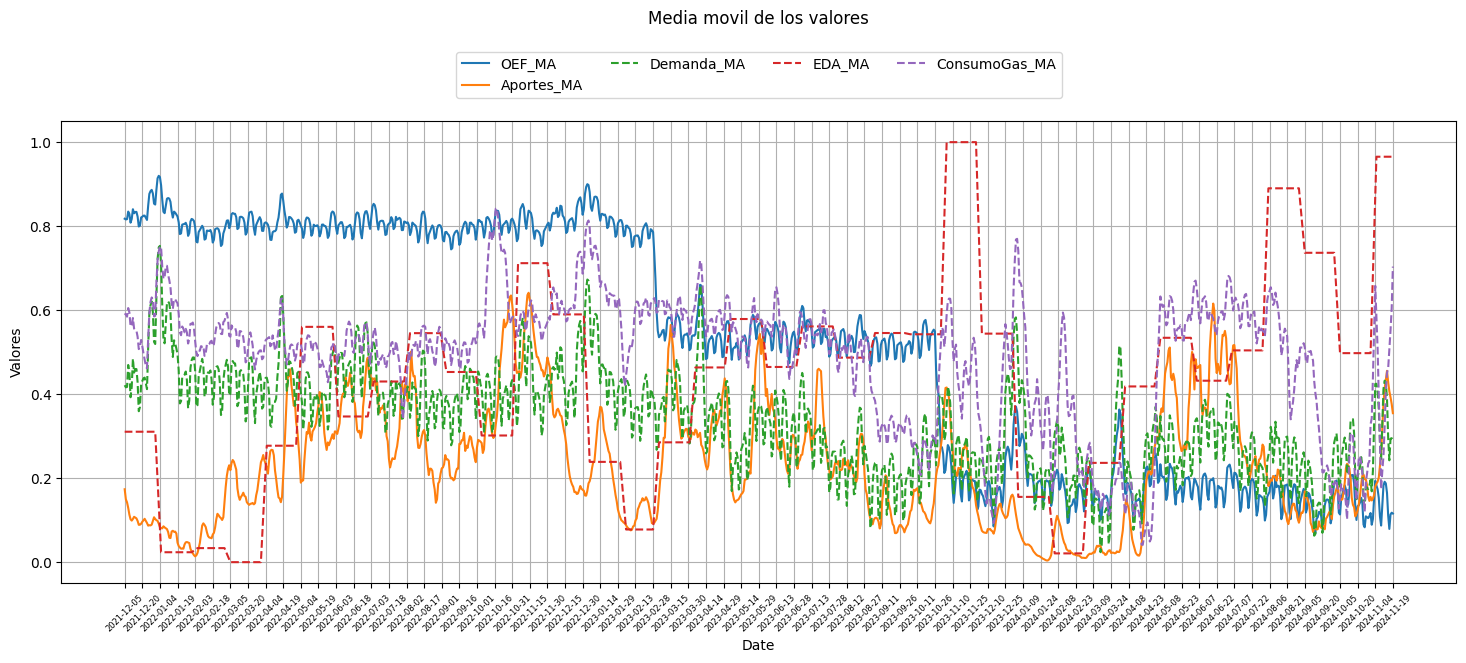

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot the original columns and moving averages
plt.figure(figsize=(18, 6))

# Plot Value1 and its moving average
plt.plot(X_norm['Date'], X_norm['OEF_MA'], label='OEF_MA')
plt.plot(X_norm['Date'], X_norm['Aportes_MA'], label='Aportes_MA')
plt.plot(X_norm['Date'], X_norm['Demanda_MA'], label='Demanda_MA', linestyle='--')
plt.plot(X_norm['Date'], X_norm['EDA_MA'], label='EDA_MA', linestyle='--')
plt.plot(X_norm['Date'], X_norm['ConsumoGas_MA'], label='ConsumoGas_MA', linestyle='--')

# Add x-ticks at specific intervals (for example, every 2nd date)
tick_positions = X_norm['Date'][::15]  # Taking every 2nd date as a tick
tick_labels = tick_positions.dt.strftime('%Y-%m-%d')  # Formatting date as string labels
plt.xticks(tick_positions, tick_labels, rotation=45, fontsize=6)  # Rotate labels for better readability
# plt.tick_params(axis='x', which='both', length=0)

# Customize the plot
plt.title('Media movil de los valores', pad=70)
plt.xlabel('Date')
plt.ylabel('Valores')

plt.legend(loc='center', bbox_to_anchor=(0.5, 1.1), ncol=4) 

plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better readability

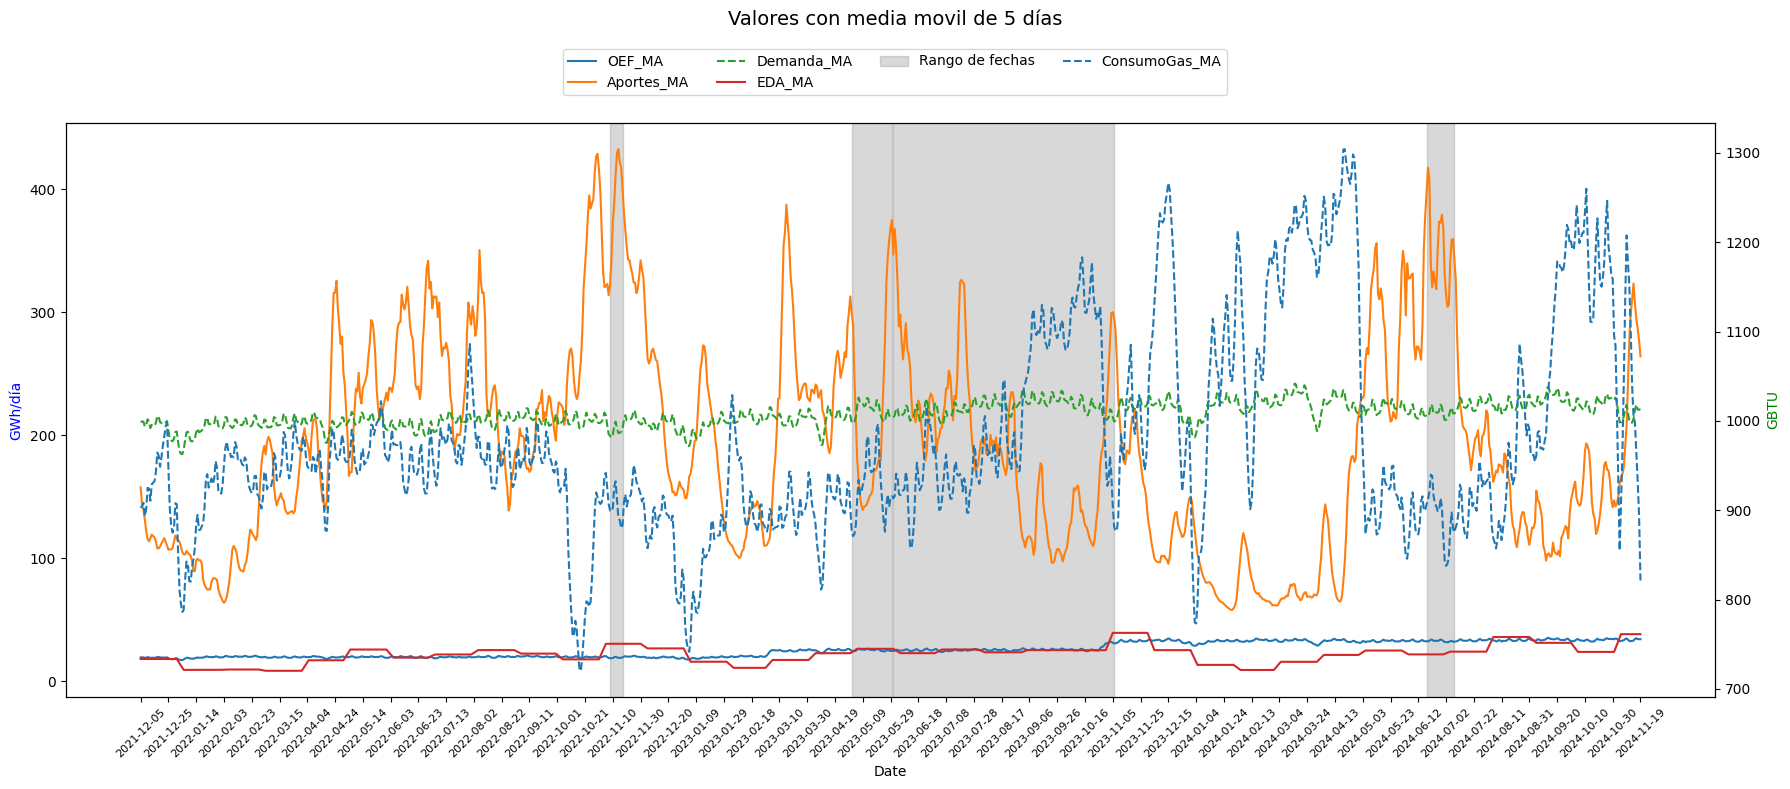

In [24]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the 5-day moving average
X_norm=df_data.copy()
X_norm['OEF_MA'] = X_norm['OEF'].rolling(window=5).mean()
X_norm['Aportes_MA'] = X_norm['Aportes'].rolling(window=5).mean()
X_norm['Demanda_MA'] = X_norm['Demanda'].rolling(window=5).mean()
X_norm['EDA_MA'] = X_norm['EDA'].rolling(window=5).mean()
X_norm['ConsumoGas_MA'] = X_norm['ConsumoGas'].rolling(window=5).mean()
X_norm['PB_MA'] = X_norm['PB'].rolling(window=5).mean()
# Shift the date column to align with the first date in the window
# X_norm['First_Date'] = X_norm['Date'].shift(-(5 - 1))
X_norm=X_norm.dropna()


# Create the primary plot
fig, ax1 = plt.subplots(figsize=(18, 8))

# Plot Value1 and its moving average on the primary y-axis
ax1.plot(X_norm['Date'], X_norm['OEF_MA'], label='OEF_MA')
ax1.plot(X_norm['Date'], X_norm['Aportes_MA'], label='Aportes_MA')
ax1.plot(X_norm['Date'], X_norm['Demanda_MA'], label='Demanda_MA',linestyle='--')
ax1.plot(X_norm['Date'], X_norm['EDA_MA'], label='EDA_MA')
# ax1.plot(X_norm['Date'], X_norm['EDA_MA'], label='EDA_MA')
ax1.set_ylabel('GWh/día', color='blue')
# ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('Date')

ax1.axvspan(first_date1, last_date1, color='gray', alpha=0.3, label='Rango de fechas')
ax1.axvspan(first_date2, last_date2, color='gray', alpha=0.3)
ax1.axvspan(first_date3, last_date3, color='gray', alpha=0.3)
ax1.axvspan(first_date4, last_date4, color='gray', alpha=0.3)

# Create the secondary y-axis
ax2 = ax1.twinx()
ax2.plot(X_norm['Date'], X_norm['ConsumoGas_MA'], label='ConsumoGas_MA', linestyle='--')
ax2.set_ylabel('GBTU', color='green')
# ax2.tick_params(axis='y', labelcolor='green')


# Combine legends and position them between the plot and the title
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
fig.legend(
    lines_1 + lines_2,
    labels_1 + labels_2,
    loc='upper center',
    bbox_to_anchor=(0.5, 0.94),  # Adjust this to position between plot and title
    ncol=4,  # Spread across 4 columns
)

# Add x-ticks at specific intervals (for example, every 2nd date)
tick_positions = X_norm['Date'][::20]  # Taking every 2nd date as a tick
tick_labels = tick_positions.dt.strftime('%Y-%m-%d')  # Formatting date as string labels
ax1.set_xticks(tick_positions)
ax1.set_xticklabels(tick_labels, rotation=45,fontsize=8)

# Add a title
fig.suptitle('Valores con media movil de 5 días', fontsize=14)

# Adjust layout to fit everything
plt.tight_layout(rect=[0, 0, 1, 0.9])  # Reserve space for the legend and title

# Show the plot
plt.show()

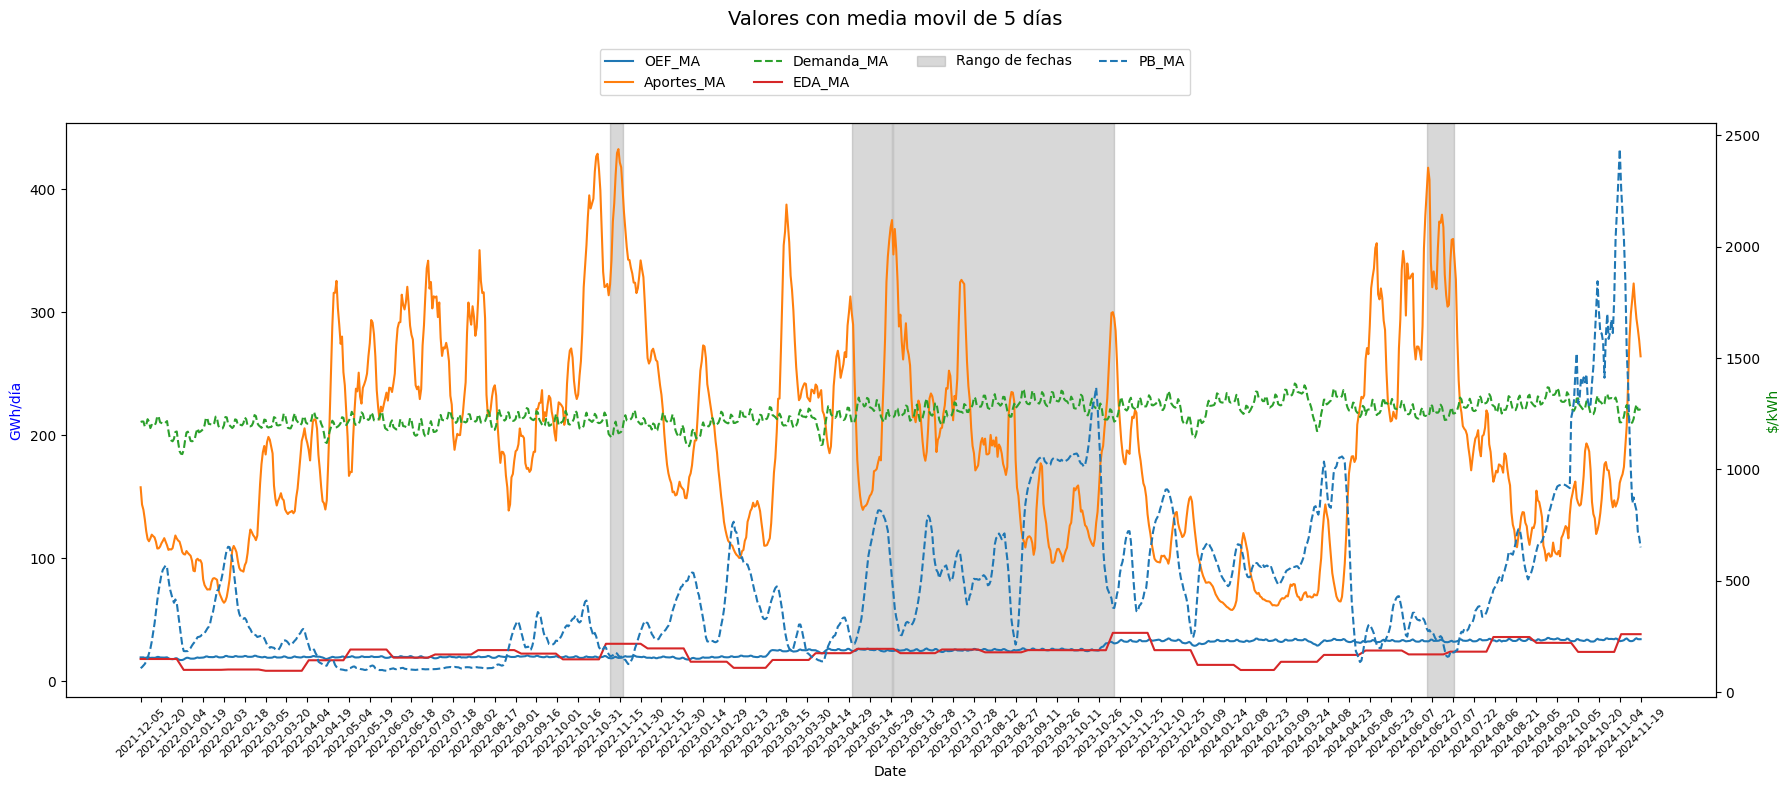

In [25]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the 5-day moving average
X_norm=df_data.copy()
X_norm['OEF_MA'] = X_norm['OEF'].rolling(window=5).mean()
X_norm['Aportes_MA'] = X_norm['Aportes'].rolling(window=5).mean()
X_norm['Demanda_MA'] = X_norm['Demanda'].rolling(window=5).mean()
X_norm['EDA_MA'] = X_norm['EDA'].rolling(window=5).mean()
X_norm['ConsumoGas_MA'] = X_norm['ConsumoGas'].rolling(window=5).mean()
X_norm['PB_MA'] = X_norm['PB'].rolling(window=5).mean()
# Shift the date column to align with the first date in the window
# X_norm['First_Date'] = X_norm['Date'].shift(-(5 - 1))
X_norm=X_norm.dropna()


# Create the primary plot
fig, ax1 = plt.subplots(figsize=(18, 8))

# Plot Value1 and its moving average on the primary y-axis
ax1.plot(X_norm['Date'], X_norm['OEF_MA'], label='OEF_MA')
ax1.plot(X_norm['Date'], X_norm['Aportes_MA'], label='Aportes_MA')
ax1.plot(X_norm['Date'], X_norm['Demanda_MA'], label='Demanda_MA',linestyle='--')
ax1.plot(X_norm['Date'], X_norm['EDA_MA'], label='EDA_MA')
# ax1.plot(X_norm['Date'], X_norm['EDA_MA'], label='EDA_MA')
ax1.set_ylabel('GWh/día', color='blue')
# ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('Date')

# Create the secondary y-axis
ax2 = ax1.twinx()
ax2.plot(X_norm['Date'], X_norm['PB_MA'], label='PB_MA', linestyle='--')
ax2.set_ylabel('$/kWh', color='green')
# ax2.tick_params(axis='y', labelcolor='green')

ax1.axvspan(first_date1, last_date1, color='gray', alpha=0.3, label='Rango de fechas')
ax1.axvspan(first_date2, last_date2, color='gray', alpha=0.3)
ax1.axvspan(first_date3, last_date3, color='gray', alpha=0.3)
ax1.axvspan(first_date4, last_date4, color='gray', alpha=0.3)


# Combine legends and position them between the plot and the title
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
fig.legend(
    lines_1 + lines_2,
    labels_1 + labels_2,
    loc='upper center',
    bbox_to_anchor=(0.5, 0.94),  # Adjust this to position between plot and title
    ncol=4,  # Spread across 4 columns
)

# Add x-ticks at specific intervals (for example, every 2nd date)
tick_positions = X_norm['Date'][::15]  # Taking every 2nd date as a tick
tick_labels = tick_positions.dt.strftime('%Y-%m-%d')  # Formatting date as string labels
ax1.set_xticks(tick_positions)
ax1.set_xticklabels(tick_labels, rotation=45,fontsize=8)

# Add a title
fig.suptitle('Valores con media movil de 5 días', fontsize=14)

# Adjust layout to fit everything
plt.tight_layout(rect=[0, 0, 1, 0.9])  # Reserve space for the legend and title

# Show the plot
plt.show()

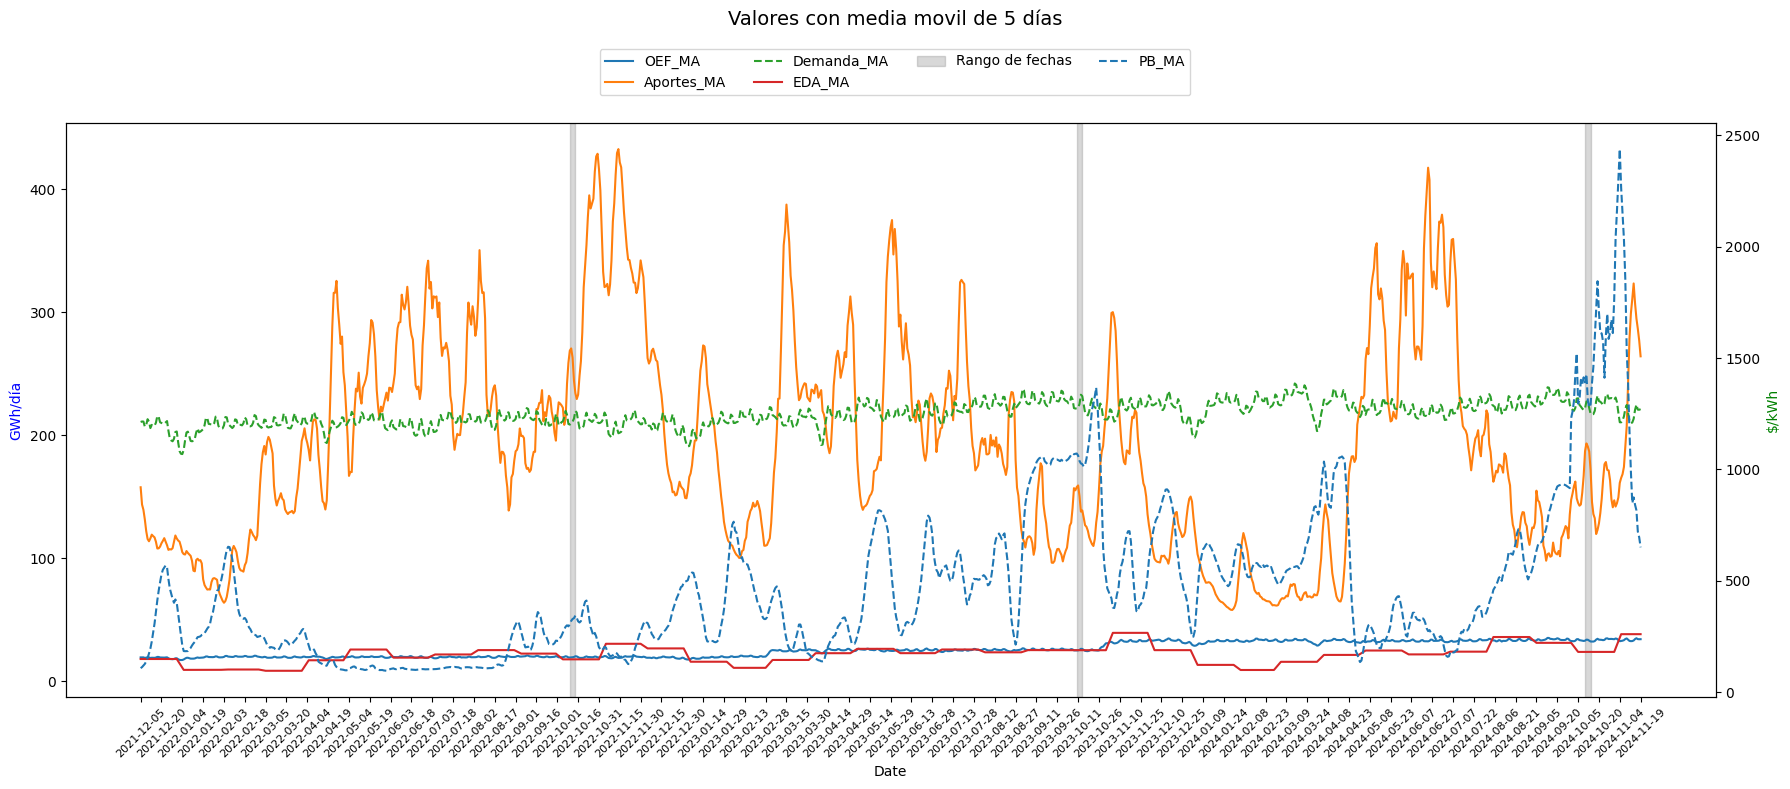

In [29]:
import pandas as pd
import matplotlib.pyplot as plt



# Calculate the 5-day moving average
X_norm=df_data.copy()
X_norm['OEF_MA'] = X_norm['OEF'].rolling(window=5).mean()
X_norm['Aportes_MA'] = X_norm['Aportes'].rolling(window=5).mean()
X_norm['Demanda_MA'] = X_norm['Demanda'].rolling(window=5).mean()
X_norm['EDA_MA'] = X_norm['EDA'].rolling(window=5).mean()
X_norm['ConsumoGas_MA'] = X_norm['ConsumoGas'].rolling(window=5).mean()
X_norm['PB_MA'] = X_norm['PB'].rolling(window=5).mean()
# Shift the date column to align with the first date in the window
# X_norm['First_Date'] = X_norm['Date'].shift(-(5 - 1))
X_norm=X_norm.dropna()


# Create the primary plot
fig, ax1 = plt.subplots(figsize=(18, 8))

# Plot Value1 and its moving average on the primary y-axis
ax1.plot(X_norm['Date'], X_norm['OEF_MA'], label='OEF_MA')
ax1.plot(X_norm['Date'], X_norm['Aportes_MA'], label='Aportes_MA')
ax1.plot(X_norm['Date'], X_norm['Demanda_MA'], label='Demanda_MA',linestyle='--')
ax1.plot(X_norm['Date'], X_norm['EDA_MA'], label='EDA_MA')
# ax1.plot(X_norm['Date'], X_norm['EDA_MA'], label='EDA_MA')
ax1.set_ylabel('GWh/día', color='blue')
# ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('Date')

# Create the secondary y-axis
ax2 = ax1.twinx()
ax2.plot(X_norm['Date'], X_norm['PB_MA'], label='PB_MA', linestyle='--')
ax2.set_ylabel('$/kWh', color='green')
# ax2.tick_params(axis='y', labelcolor='green')

ax1.axvspan(pd.to_datetime('2022-10-10'), pd.to_datetime('2022-10-14'), color='gray', alpha=0.3, label='Rango de fechas')
ax1.axvspan(pd.to_datetime('2023-10-10'),pd.to_datetime('2023-10-14'), color='gray', alpha=0.3)
ax1.axvspan(pd.to_datetime('2024-10-10'), pd.to_datetime('2024-10-14'), color='gray', alpha=0.3)


# Combine legends and position them between the plot and the title
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
fig.legend(
    lines_1 + lines_2,
    labels_1 + labels_2,
    loc='upper center',
    bbox_to_anchor=(0.5, 0.94),  # Adjust this to position between plot and title
    ncol=4,  # Spread across 4 columns
)

# Add x-ticks at specific intervals (for example, every 2nd date)
tick_positions = X_norm['Date'][::15]  # Taking every 2nd date as a tick
tick_labels = tick_positions.dt.strftime('%Y-%m-%d')  # Formatting date as string labels
ax1.set_xticks(tick_positions)
ax1.set_xticklabels(tick_labels, rotation=45,fontsize=8)

# Add a title
fig.suptitle('Valores con media movil de 5 días', fontsize=14)

# Adjust layout to fit everything
plt.tight_layout(rect=[0, 0, 1, 0.9])  # Reserve space for the legend and title

# Show the plot
plt.show()

In [44]:
# Función para asignar los días de la semana a cada fecha, si es festivo se trata como un domingo
import holidays
co_holidays = holidays.Colombia()

def typedays(row,weekday):

     if weekday==True:
          return row['Date'].weekday()
     else:
          if row['Date'] in co_holidays:
               return 'F'
          elif row['Date'].weekday()==5:
               return 'S'
          elif row['Date'].weekday()==6:
               return 'F'
          else:
               return 'O'

In [51]:
df_DateSFRU=X_norm.copy()
df_DateSFRU['day_osf']=df_DateSFRU.apply(lambda row: typedays(row,weekday=False),axis=1)
df_DateSFRU['mes']=df_DateSFRU['Date'].dt.month
df_DateSFRU['dia']=df_DateSFRU['Date'].dt.day
df_DateSFRU['year']=df_DateSFRU['Date'].dt.year
df_DateSFRU=df_DateSFRU[(df_DateSFRU['mes']==10) & (df_DateSFRU['dia']>=10) & (df_DateSFRU['dia']<=14)]
l_col=df_DateSFRU.columns[1:-4]
df_DateSFRU=df_DateSFRU.groupby(['day_osf','year'])[l_col].mean()
df_DateSFRU = df_DateSFRU.sort_index(level=['year'])
df_DateSFRU

OEF    Aportes     Demanda        EDA  ConsumoGas  \
day_osf year                                                            
O       2022  20.446778  234.36884  219.799546  17.937310    776.2948   
        2023  26.707486  139.46205  234.730332  25.367731   1190.4875   
S       2023  25.097830  136.95730  220.539893  25.367731   1154.0250   
F       2024  30.375281  146.41660  203.742565  23.982123   1041.3990   
O       2024  34.195868  211.56890  228.958018  23.982123   1243.6985   
S       2024  33.065283  142.21730  222.191900  23.982123    985.5560   

                       PB     OEF_MA  Aportes_MA  Demanda_MA     EDA_MA  \
day_osf year                                                              
O       2022   343.990154  19.779434   256.31252  212.597965  17.937310   
        2023  1017.044027  25.661219   151.44704  225.738779  25.367731   
S       2023  1052.428393  26.385555   138.96110  231.892245  25.367731   
F       2024  1434.229135  32.794793   179.25409  219.883742  23.982123   
O       2024  1292.879423  33.525007   190.33395  224.810404  23.982123   
S       2024  1008.039095  33.845415   190.88258  226.961464  23.982123   

              ConsumoGas_MA        PB_MA  
day_osf year                              
O       2022      780.89628   326.005227  
        2023     1155.56175  1049.883558  
S       2023     1183.19500  1024.120901  
F       2024     1129.18700  1285.881875  
O       2024     1246.51530  1409.288157  
S       2024     1202.05680  1309.511463